# Importing Libraries

In [10]:
import numpy as np # Version '1.26.4'
import pandas as pd # Version '2.2.2'
import matplotlib # Version '3.9.0'
from matplotlib import pyplot as plt 
import seaborn as sns # Version '0.13.2'
import sklearn # Version '1.5.0'

print('Numpy', np.__version__)
print('Pandas', pd.__version__)
print('Matplotlib', matplotlib.__version__)
print('Seaborn', sns.__version__)
print('Sklearn', sklearn.__version__)


Numpy 1.26.4
Pandas 2.2.2
Matplotlib 3.9.0
Seaborn 0.13.2
Sklearn 1.5.0


# Loading Dataset

In [3]:
df = pd.read_csv('../data/modelling_data.csv')
df[:5]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


# Data Preprocessing

In [5]:
from sklearn.model_selection import train_test_split

X = df.drop('Outcome', axis=1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)

In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [29]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=15)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

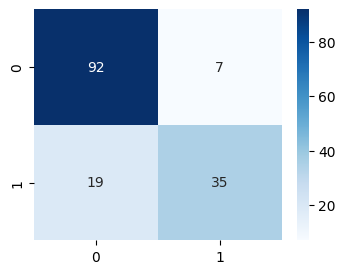

In [35]:
from sklearn.metrics import jaccard_score, classification_report, confusion_matrix, accuracy_score, f1_score

plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, y_pred), cmap='Blues', annot=True)
plt.show()

In [31]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.93      0.88        99
           1       0.83      0.65      0.73        54

    accuracy                           0.83       153
   macro avg       0.83      0.79      0.80       153
weighted avg       0.83      0.83      0.82       153



In [32]:
jaccard_score(y_test, y_pred).round(2)

0.57

In [33]:
accuracy_score(y_test, y_pred)

0.8300653594771242

In [26]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_neighbors': np.arange(1,26)
}

model_gs = GridSearchCV(model, param_grid, scoring='f1', cv=10)
model_gs.fit(X_train, y_train)
y_pred_gs = model_gs.predict(X_test)

In [27]:
model_gs.best_params_

{'n_neighbors': 15}

In [28]:
model_gs.best_score_

0.7039488020413177

In [36]:
f1_score(y_test, y_pred)

0.7291666666666666

# Model Export


In [34]:
from joblib import dump

dump(model, '../models/knn_model.joblib')
dump(scaler, '../models/scaler.joblib')

['../models/scaler.joblib']